In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import BboxImage
from matplotlib.transforms import Bbox, TransformedBbox
import numpy as np
from matplotlib.text import OffsetFrom

In [2]:
df =  pd.read_csv('data.txt')
df

,Season,Squad,Country,Comp,LgRank,MP,W,D,L,GF,GA,GDiff,Pts,Attendance,Top Team Scorer,Goalkeeper,Notes
0,2020-2021,Leeds United,eng ENG,1. Premiership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-2020,Leeds United,eng ENG,2. Championship,1st,45.0,27.0,9.0,9.0,73.0,35.0,38.0,90.0,35321.0,Patrick Bamford - 16,Kiko Casilla,Promoted
2,2018-2019,Leeds United,eng ENG,2. Championship,3rd,46.0,25.0,8.0,13.0,73.0,50.0,23.0,83.0,34033.0,Kemar Roofe - 14,Bailey Peacock-Farrell,→ Semi-finals
3,2017-2018,Leeds United,eng ENG,2. Championship,13th,46.0,17.0,9.0,20.0,59.0,64.0,-5.0,60.0,31525.0,Kemar Roofe - 11,Felix Wiedwald,NaN
4,2016-2017,Leeds United,eng ENG,2. Championship,7th,46.0,22.0,9.0,15.0,61.0,47.0,14.0,75.0,27698.0,Chris Wood - 27,Robert Green,NaN
5,2015-2016,Leeds United,eng ENG,2. Championship,13th,46.0,14.0,17.0,15.0,50.0,58.0,-8.0,59.0,22446.0,Chris Wood - 13,Marco Silvestri,NaN
6,2014-2015,Leeds United,eng ENG,2. Championship,15th,46.0,15.0,11.0,20.0,50.0,61.0,-11.0,56.0,24052.0,Mirco Antenucci - 10,Marco Silvestri,NaN
7,2013-2014,Leeds United,eng ENG,2. Championship,15th,46.0,16.0,9.0,21.0,59.0,67.0,-8.0,57.0,25088.0,Ross McCormack - 28,Paddy Kenny,NaN
8,2012-2013,Leeds United,eng ENG,2. Championship,13th,46.0,17.0,10.0,19.0,57.0,66.0,-9.0,61.0,21572.0,Luciano Becchio - 16,Paddy Kenny,NaN
9,2011-2012,Leeds United,eng ENG,2. Championship,14th,46.0,17.0,10.0,19.0,65.0,68.0,-3.0,61.0,23283.0,Ross McCormack - 18,Andy Lonergan,NaN


In [3]:
#setting values for each competition
df.loc[df['Comp'] == '3. League One','Comp_num'] = 1
df.loc[df['Comp'] == '2. Championship','Comp_num'] = 2
df.loc[df['Comp'] == '1. Premiership','Comp_num'] = 3
#sorting 
df.sort_index(ascending = False, inplace = True)

In [4]:
df

,Season,Squad,Country,Comp,LgRank,MP,W,D,L,GF,GA,GDiff,Pts,Attendance,Top Team Scorer,Goalkeeper,Notes,Comp_num
28,1992-1993,Leeds United,eng ENG,1. Premiership,17th,42.0,12.0,15.0,15.0,57.0,62.0,-5.0,51.0,29229.0,Lee Chapman - 13,John Lukic,NaN,3.0
27,1993-1994,Leeds United,eng ENG,1. Premiership,5th,42.0,18.0,16.0,8.0,65.0,39.0,26.0,70.0,36368.0,Rod Wallace - 17,Mark Beeney,NaN,3.0
26,1994-1995,Leeds United,eng ENG,1. Premiership,5th,42.0,20.0,13.0,9.0,59.0,38.0,21.0,73.0,33433.0,Tony Yeboah - 12,John Lukic,→ UEFA Cup via league finish,3.0
25,1995-1996,Leeds United,eng ENG,1. Premiership,13th,38.0,12.0,7.0,19.0,40.0,57.0,-17.0,43.0,32413.0,Tony Yeboah - 12,John Lukic,NaN,3.0
24,1996-1997,Leeds United,eng ENG,1. Premiership,11th,38.0,11.0,13.0,14.0,28.0,38.0,-10.0,46.0,32109.0,Brian Deane Lee Sharpe - 5,Nigel Martyn,NaN,3.0
23,1997-1998,Leeds United,eng ENG,1. Premiership,5th,38.0,17.0,8.0,13.0,57.0,46.0,11.0,59.0,34444.0,Jimmy Floyd Hasselbaink - 16,Nigel Martyn,→ UEFA Cup via league finish,3.0
22,1998-1999,Leeds United,eng ENG,1. Premiership,4th,38.0,18.0,13.0,7.0,62.0,34.0,28.0,67.0,35845.0,Jimmy Floyd Hasselbaink - 18,Nigel Martyn,→ UEFA Cup via league finish,3.0
21,1999-2000,Leeds United,eng ENG,1. Premiership,3rd,38.0,21.0,6.0,11.0,58.0,43.0,15.0,69.0,39154.0,Michael Bridges - 19,Nigel Martyn,→ UEFA Champions League via league finish,3.0
20,2000-2001,Leeds United,eng ENG,1. Premiership,4th,38.0,20.0,8.0,10.0,64.0,43.0,21.0,68.0,38974.0,Mark Viduka - 17,Nigel Martyn,→ UEFA Cup via league finish,3.0
19,2001-2002,Leeds United,eng ENG,1. Premiership,5th,38.0,18.0,12.0,8.0,53.0,37.0,16.0,66.0,39752.0,Robbie Fowler - 15,Nigel Martyn,→ UEFA Cup via league finish,3.0


In [97]:
plt.style.use('Solarize_Light2')
#plt.style.use('default')

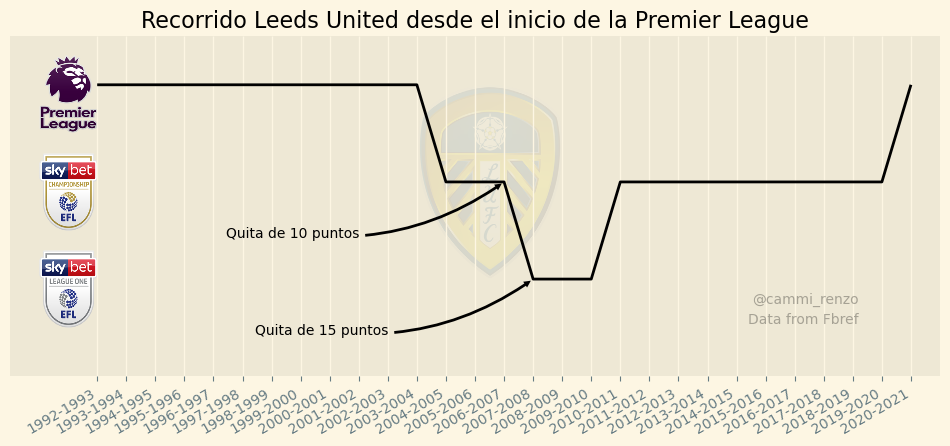

In [132]:
fig, ax = plt.subplots(figsize = (12,5))

x = df['Season']
y = df['Comp_num']

#plot
plt.plot(x,y,'black',alpha=1,lw=2)

#Load images
prem_im = plt.imread('premier.png')
champ_im = plt.imread('champ.png')
league_1_im = plt.imread('league_1.png')
leeds_im = plt.imread('leeds_logo.png')

#plot prem image 
bb = Bbox.from_bounds(-2,2.5,2,0.8)  
bb2 = TransformedBbox(bb,ax.transData)
bbox_image = BboxImage(bb2,
                       norm = None,
                       origin=None,
                       clip_on=False,
                       )
bbox_image.set_data(prem_im)
ax.add_artist(bbox_image)

#plot champ image 
bb = Bbox.from_bounds(-2,1.5,2,0.8)  
bb2 = TransformedBbox(bb,ax.transData)
bbox_image = BboxImage(bb2,
                       norm = None,
                       origin=None,
                       clip_on=False)
bbox_image.set_data(champ_im)
ax.add_artist(bbox_image)

#plot league 1 image 
bb = Bbox.from_bounds(-2,0.5,2,0.8)  
bb2 = TransformedBbox(bb,ax.transData)
bbox_image = BboxImage(bb2,
                       norm = None,
                       origin=None,
                       clip_on=False)
bbox_image.set_data(league_1_im)
ax.add_artist(bbox_image)

#decorate
#ax.set_xticks(5)
plt.gcf().autofmt_xdate()
ax.set_ylim(0,3.5)
ax.set_xlim(-3,29)
plt.yticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_title('Recorrido Leeds United desde el inicio de la Premier League')

#plot leeds image
bb = Bbox.from_bounds(11,1,5,2)  
bb2 = TransformedBbox(bb,ax.transData)
bbox_image = BboxImage(bb2,
                       norm = None,
                       origin=None,
                       clip_on=False,
                       alpha=0.1
                       )
bbox_image.set_data(leeds_im)
ax.add_artist(bbox_image)

#annotations
ax.annotate('Quita de 10 puntos',
            xy=(14, 2), xycoords='data',
            xytext=(-200, -40), textcoords='offset points',
            size=10,
            # bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="simple",
                            fc="0.0", ec="none",
                            #patchB=el,
                            connectionstyle="arc3,rad=0.2"))

ax.annotate('Quita de 15 puntos',
            xy=(15, 1), xycoords='data',
            xytext=(-200, -40), textcoords='offset points',
            size=10,
            # bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="simple",
                            fc="0.0", ec="none",
                            #patchB=el,
                            connectionstyle="arc3,rad=0.2"))

ax.annotate('@cammi_renzo',
            xy=(25, 0.7), xycoords='data',
            textcoords='offset points',
            size=10,
            horizontalalignment='right',
            verticalalignment='bottom',
            alpha=0.3
            )

ax.annotate('Data from Fbref',
            xy=(25, 0.5), xycoords='data',
            textcoords='offset points',
            size=10,
            horizontalalignment='right',
            verticalalignment='bottom',
            alpha=0.3
            )

plt.savefig('leeds_3.png')

plt.show()
